In [1]:
import pandas as pd

tsv = "/work/isabl/home/isablbot/wgs_indels/any2lcc-pos/any2lcc_agg.tsv.gz"

indels = []
chunks = pd.read_csv(
    filepath_or_buffer=tsv,
    compression="gzip",
    chunksize=20000,
    sep="\t",
    comment="#",
    low_memory=False,
    dtype={"CHR": str},
)
for i in chunks:
    indels.append(i)

pool = pd.concat(indels)

In [2]:
len(pool)

172799

COUNT
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mutect_MEDIAN_VAF, dtype: object

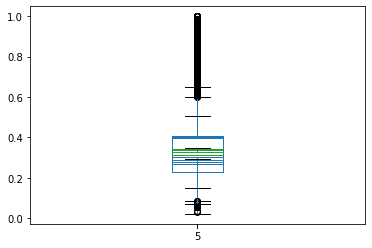

In [3]:
%matplotlib inline
pool.groupby(['COUNT'])['mutect_MEDIAN_VAF'].plot(kind='box')

In [4]:
pool.columns

Index(['CHR', 'START', 'COUNT', 'pindel_MEDIAN_VAF', 'mutect_MEDIAN_VAF',
       'strelka_MEDIAN_VAF', 'pindel_VAF_Q25', 'pindel_VAF_Q75',
       'mutect_VAF_Q25', 'mutect_VAF_Q75', 'strelka_VAF_Q25',
       'strelka_VAF_Q75', 'REF', 'ALT'],
      dtype='object')

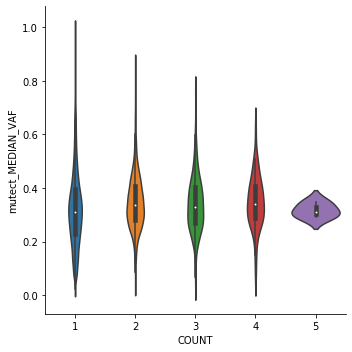

In [5]:
import seaborn as sns
%matplotlib inline

sns.catplot(data=pool, x='COUNT', y='mutect_MEDIAN_VAF', kind="violin")

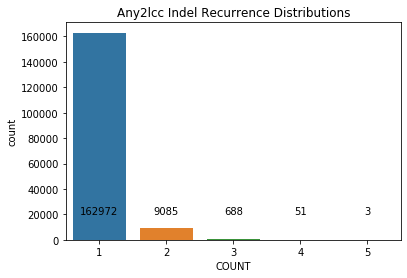

In [23]:
import matplotlib.pyplot as plt

sns.countplot(data=pool, x='COUNT')
plt.title("Any2lcc Indel Recurrence Distributions")
for i, data in enumerate(pool["COUNT"].value_counts()):
    plt.text(i,20_000, str(data), horizontalalignment='center')

In [17]:
for i, data in enumerate(pool["COUNT"].value_counts()):


0
1
2
3
4
